In [191]:
!pip install seaborn 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 서울 상권 분석 EDA

상권 분석 : 해당 상권이 특정 업종에 적합한지 다각도로 분석하는것을 의미 한다 


20 30 , 30 40 세대 기준으로 상권 분석 할 예정이다 

2019- 2023의 데이터가 존재 하는데 2022-2023까지의 데이터를 사용할 예정이다 

사용한 서울 상권 데이터   

* 생활 인구 
    * 20 30 , 30 40의 유동인구를 파악하는 목적 [날짜나 시간까지 하면 좋을것 같다]

* 상주 인구 
    * 상권내에 인구가 얼마나 있는지 파악하기 위함 
    
* 아파트 
    *  상권내에 아파트 단지가 몇개 있는지 파악 목적 
 
 
 * 점포 
     * 한국 표준 산업 분류 테이블 기준으로 상권내에 있는 업종을 파악하는게 목적이다 

* 접객 시설 
    * 교통이나, 주변에 학교(초중고대)[학교많은지역과 아파트상관관계 보통 높다] 
    * 상권에 접근성이 좋은지 판단 목적 
    
* 직장 인구 
    * 2030 3040세대의 직장 인구 파악 위함 

* 추정 매출
    *  20 30 3040의 분기면 매출추정 하기 위함 
* 상권 영역 
    * 해당 지역을 표시하기 위한 좌표값 들어있다 서울 지도 완성 하기 위함 


In [192]:
#import lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
     
plt.rc("font", family = "Malgun Gothic")

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [193]:
%pwd

'C:\\Users\\maeng\\Ai 내용 정리 및 실습 내용'

In [194]:
# read csv data 
file_path = "./data/데사응텀프/"
floating_population  =pd.read_csv(file_path+"서울시 상권분석서비스(길단위인구-상권).csv",encoding='euc-kr')

settled_population = pd.read_csv(file_path+"서울시 상권분석서비스(상주인구-상권).csv",encoding='euc-kr')
apartment = pd.read_csv(file_path+"서울시 상권분석서비스(아파트-상권).csv",encoding='euc-kr')
shop = pd.read_csv(file_path+"서울시 상권분석서비스(점포-상권).csv",encoding='euc-kr')

facility = pd.read_csv(file_path+"서울시 상권분석서비스(집객시설-상권).csv",encoding='euc-kr')

worker = pd.read_csv(file_path+"서울시 상권분석서비스(직장인구-상권).csv",encoding='euc-kr')

estimated_sale = pd.read_csv(file_path+"서울시 상권분석서비스(추정매출-상권).csv",encoding='euc-kr')

estimated_sale_2021 = pd.read_csv(file_path+"서울시_상권분석서비스(추정매출-상권)_2021년.csv",encoding='euc-kr')


In [195]:
# 상권내에서 생활하는 인구 파악 
# 인구 수 파악이 목적이니까 총 상주 인구수만 가져 간다 
#settled_population = pd.read_csv(file_path+"서울시 상권분석서비스(상주인구-상권).csv",encoding='euc-kr')

settled_population.fillna(0,inplace=True) # 결측치 제거 


In [196]:
settled_population=settled_population[['기준_년분기_코드', '상권_구분_코드_명','상권_코드','상권_코드_명', '총_상주인구_수']]
settled_population=settled_population[settled_population['기준_년분기_코드']>=20211] #2021년도 부터 

In [197]:
settled_population.head()

,기준_년분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_상주인구_수
8170,20211,골목상권,3110001,이북5도청사,1020
8171,20211,골목상권,3110002,독립문역 1번,629
8172,20211,골목상권,3110003,세검정초등학교,3212
8173,20211,골목상권,3110004,대신고등학교,471
8174,20211,골목상권,3110005,세검정,2153


In [198]:
# 상권 구분 코드 명(발달 골목 등등), 상권 코드 명의 인구수 합하기 
settled_population=settled_population[["총_상주인구_수"]].groupby([settled_population["상권_구분_코드_명"],settled_population["상권_코드_명"]]).sum()      

In [199]:
settled_population["상권_구분_코드_명"]=settled_population.index.map(lambda x: x[0])
settled_population["상권_코드_명"] = settled_population.index.map(lambda x: x[1])

In [200]:
settled_population=settled_population.reset_index(drop=True)

In [201]:
# 유동 인구 파악 하기 - 2030 3040세대만c 파악해서 정리 하기 
"""
기준_년분기_코드
상권_구분_코드_명
상권_코드_명
연령대_20_유동인구_수
연령대_30_유동인구_수
연령대_40_유동인구_수

"""
# df=floating_population.corr()

# sns.heatmap(df, 
#                annot = True,      # 실제 값 화면에 나타내기
#                cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
#                vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
#               )

'\n기준_년분기_코드\n상권_구분_코드_명\n상권_코드_명\n연령대_20_유동인구_수\n연령대_30_유동인구_수\n연령대_40_유동인구_수\n\n'

In [202]:
settled_population.head()

,총_상주인구_수,상권_구분_코드_명,상권_코드_명
0,12225,골목상권,4.19민주묘지역 2번
1,32848,골목상권,GS강동자이아파트
2,38697,골목상권,G타워
3,25714,골목상권,KB국민은행 망원동지점
4,5175,골목상권,KB국민은행 서강지점


In [203]:
#floating_population  =pd.read_csv(file_path+"서울시 상권분석서비스(길단위인구-상권).csv",encoding='euc-kr')


In [204]:
floating_population.fillna(0,inplace=True) # 결측치 제거 

In [205]:
floating_population=floating_population[['기준_년분기_코드', '상권_구분_코드_명','상권_코드','상권_코드_명', '연령대_20_유동인구_수','연령대_30_유동인구_수','연령대_40_유동인구_수']]
floating_population=floating_population[floating_population['기준_년분기_코드']>=20211]

In [206]:
floating_population.head()

,기준_년분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수
2606,20231,골목상권,3110227,답십리공원,394121,549004,629451
5451,20231,골목상권,3110617,등촌역 4번,560811,748555,685270
5452,20231,골목상권,3110717,남구로역 2번,1154731,1722320,1708249
5679,20231,골목상권,3110993,개포지하차도 북측,4114,11362,9111
7643,20224,골목상권,3110934,우면주공아파트,213215,348988,378880


In [207]:
# 상권 구분 코드 명(발달 골목 등등), 상권 코드 명의 인구수 합하기 
floating_population1 = floating_population
floating_population2 = floating_population
floating_population3 = floating_population

floating_population1=floating_population1[["연령대_20_유동인구_수"]].groupby([floating_population1["상권_구분_코드_명"],floating_population1["상권_코드_명"],floating_population1["상권_코드"]]).sum()               
floating_population2=floating_population2[["연령대_30_유동인구_수"]].groupby([floating_population2["상권_구분_코드_명"],floating_population2["상권_코드_명"],floating_population2["상권_코드"]]).sum()
floating_population3=floating_population3[["연령대_40_유동인구_수"]].groupby([floating_population3["상권_구분_코드_명"],floating_population3["상권_코드_명"],floating_population3["상권_코드"]]).sum()



In [208]:
#floating_population1.columns=['연령대_20_유동인구_수']
floating_population1.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']
floating_population1['상권_구분_코드_명'] = floating_population1.index.map(lambda x:x[0])
floating_population1['상권_코드_명']=floating_population1.index.map(lambda x:x[1])
floating_population1['상권_코드']=floating_population1.index.map(lambda x:x[2])
floating_population1=floating_population1.reset_index(drop=True)


In [209]:
floating_population1.head()


,연령대_20_유동인구_수,상권_구분_코드_명,상권_코드_명,상권_코드
0,4130630,골목상권,4.19민주묘지역 2번,3110346
1,6072295,골목상권,GS강동자이아파트,3111083
2,8410132,골목상권,G타워,3110722
3,9643067,골목상권,KB국민은행 망원동지점,3110547
4,2270543,골목상권,KB국민은행 서강지점,3110570


In [210]:
floating_population2.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']
floating_population2['상권_구분_코드_명'] = floating_population2.index.map(lambda x:x[0])
floating_population2['상권_코드_명']=floating_population2.index.map(lambda x:x[1])
floating_population2['상권_코드']=floating_population2.index.map(lambda x:x[2])
floating_population2=floating_population2.reset_index(drop=True)

In [211]:
floating_population2.head()


,연령대_30_유동인구_수,상권_구분_코드_명,상권_코드_명,상권_코드
0,3038515,골목상권,4.19민주묘지역 2번,3110346
1,7398888,골목상권,GS강동자이아파트,3111083
2,9200484,골목상권,G타워,3110722
3,10769392,골목상권,KB국민은행 망원동지점,3110547
4,3252108,골목상권,KB국민은행 서강지점,3110570


In [212]:
floating_population3.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']
floating_population3['상권_구분_코드_명'] = floating_population3.index.map(lambda x:x[0])
floating_population3['상권_코드_명']=floating_population3.index.map(lambda x:x[1])
floating_population3['상권_코드']=floating_population3.index.map(lambda x:x[2])
floating_population3=floating_population3.reset_index(drop=True)

In [213]:
floating_population3.head()


,연령대_40_유동인구_수,상권_구분_코드_명,상권_코드_명,상권_코드
0,3416788,골목상권,4.19민주묘지역 2번,3110346
1,8351916,골목상권,GS강동자이아파트,3111083
2,5986024,골목상권,G타워,3110722
3,10228673,골목상권,KB국민은행 망원동지점,3110547
4,3633154,골목상권,KB국민은행 서강지점,3110570


In [214]:
# 직장 인구 
# 연령별 20 30 40별 직장인구만을 대상으로 한다 목적이 203040의 발달 상권 분석하고싶은거니까 

worker = worker.fillna(0)


In [215]:
worker=worker[['기준_년분기_코드', '상권_구분_코드_명','상권_코드','상권_코드_명', '연령대_20_직장_인구_수','연령대_30_직장_인구_수','연령대_40_직장_인구_수']]          
worker=worker[worker['기준_년분기_코드']>=20211]

In [216]:
worker.head()

,기준_년분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수
1494,20212,골목상권,3110321,동덕여대,0,4,13
1765,20212,발달상권,3120007,북촌(안국역),1148,3636,3182
1766,20212,골목상권,3110018,중앙고등학교,92,166,209
1767,20212,골목상권,3110006,부암동주민센터,2,7,7
1768,20212,골목상권,3110012,성곡미술관,260,329,260


In [217]:

worker1 = worker
worker2 = worker
worker3 = worker

worker1=worker1[["연령대_20_직장_인구_수"]].groupby([worker1["상권_구분_코드_명"],worker1["상권_코드_명"],worker1["상권_코드"]]).sum()               
worker2=worker2[["연령대_30_직장_인구_수"]].groupby([worker2["상권_구분_코드_명"],worker2["상권_코드_명"],worker2["상권_코드"]]).sum()
worker3=worker3[["연령대_40_직장_인구_수"]].groupby([worker3["상권_구분_코드_명"],worker3["상권_코드_명"],worker3["상권_코드"]]).sum()



In [218]:
worker1.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']
worker1['상권_구분_코드_명'] = worker1.index.map(lambda x:x[0])
worker1['상권_코드_명']=worker1.index.map(lambda x:x[1])
worker1['상권_코드']=worker1.index.map(lambda x:x[2])
worker1=worker1.reset_index(drop=True)

worker2.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']
worker2['상권_구분_코드_명'] = worker2.index.map(lambda x:x[0])
worker2['상권_코드_명']=worker2.index.map(lambda x:x[1])
worker2['상권_코드']=worker2.index.map(lambda x:x[2])
worker2=worker2.reset_index(drop=True)

worker3.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']
worker3['상권_구분_코드_명'] = worker3.index.map(lambda x:x[0])
worker3['상권_코드_명']=worker3.index.map(lambda x:x[1])
worker3['상권_코드']=worker3.index.map(lambda x:x[2])
worker3=worker3.reset_index(drop=True)


In [219]:
worker1.head()

,연령대_20_직장_인구_수,상권_구분_코드_명,상권_코드_명,상권_코드
0,120,골목상권,4.19민주묘지역 2번,3110346
1,670,골목상권,GS강동자이아파트,3111083
2,1520,골목상권,G타워,3110722
3,130,골목상권,KB국민은행 망원동지점,3110547
4,40,골목상권,KB국민은행 서강지점,3110570


In [220]:
worker2.head()

,연령대_30_직장_인구_수,상권_구분_코드_명,상권_코드_명,상권_코드
0,130,골목상권,4.19민주묘지역 2번,3110346
1,620,골목상권,GS강동자이아파트,3111083
2,2960,골목상권,G타워,3110722
3,470,골목상권,KB국민은행 망원동지점,3110547
4,220,골목상권,KB국민은행 서강지점,3110570


In [221]:
worker3.head()

,연령대_40_직장_인구_수,상권_구분_코드_명,상권_코드_명,상권_코드
0,190,골목상권,4.19민주묘지역 2번,3110346
1,700,골목상권,GS강동자이아파트,3111083
2,2490,골목상권,G타워,3110722
3,930,골목상권,KB국민은행 망원동지점,3110547
4,180,골목상권,KB국민은행 서강지점,3110570


In [222]:
#apartment = pd.read_csv(file_path+"서울시 상권분석서비스(아파트-상권).csv",encoding='euc-kr')

In [223]:
# apartment 
apartment=apartment.fillna(0)

In [224]:
apartment = apartment[['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명','상권_코드','아파트_단지_수']]
apartment = apartment[apartment['기준_년분기_코드'] >= 20211]

In [225]:
apartment = apartment[['상권_코드_명', '아파트_단지_수']].groupby([apartment['상권_구분_코드_명'], apartment['상권_코드_명'],apartment['상권_코드']]).sum()    

In [226]:
apartment.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']

apartment['상권_구분_코드_명'] = apartment.index.map(lambda x: x[0])
apartment['상권_코드_명'] = apartment.index.map(lambda x: x[1])
apartment['상권_코드'] = apartment.index.map(lambda x: x[2])
apartment = apartment.reset_index(drop=True)

In [227]:
apartment.head()

,아파트_단지_수,상권_구분_코드_명,상권_코드_명,상권_코드
0,254,골목상권,4.19민주묘지역 2번,3110346
1,580,골목상권,GS강동자이아파트,3111083
2,143,골목상권,G타워,3110722
3,531,골목상권,KB국민은행 망원동지점,3110547
4,30,골목상권,KB국민은행 서강지점,3110570


In [228]:
# 상점 구분 

shop=shop.fillna(0)

In [229]:
shop = shop[['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명','상권_코드','서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '프랜차이즈_점포_수']]    
shop = shop[shop['기준_년분기_코드'] >= 20211]

In [230]:
shop.head()

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,상권_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,프랜차이즈_점포_수
0,20221,관광특구,이태원 관광특구,3001491,한식음식점,161,169,8
1,20221,관광특구,이태원 관광특구,3001491,중식음식점,17,17,0
2,20221,관광특구,이태원 관광특구,3001491,일식음식점,19,20,1
3,20221,관광특구,이태원 관광특구,3001491,양식음식점,217,220,3
4,20221,관광특구,이태원 관광특구,3001491,제과점,19,24,5


In [231]:
# 유사 업종 점포수 , 프렌차이즈 점포수까지 하나의 점포수로 합치기 
shop['점포_수'] = shop['점포_수'] + shop['유사_업종_점포_수'] + shop['프랜차이즈_점포_수']
shop = shop.drop(['유사_업종_점포_수', '프랜차이즈_점포_수'], axis=1)
     

In [232]:
shop = shop.assign(구분=0)

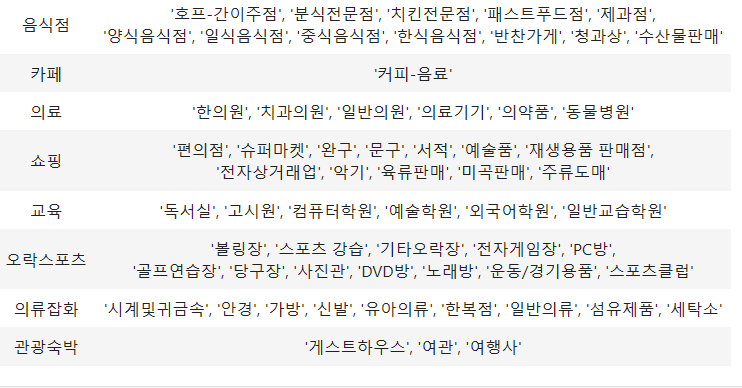

In [233]:
#food, cafe, medi, shop_list, edu, sport, cloth, tour = [], [], [], [], [], [], [], []

for idx, service in enumerate(shop['서비스_업종_코드_명']):
  if service in ['호프-간이주점', '분식전문점', '치킨전문점', '패스트푸드점', '제과점', '양식음식점', '일식음식점', '중식음식점', '한식음식점', '반찬가게', '청과상', '수산물판매']:
    shop['구분'][idx] = '음식점'
  elif service in ['커피-음료']:
    shop['구분'][idx] = '카페'
  elif service in ['한의원', '치과의원', '일반의원', '의료기기', '의약품', '동물병원']:
    shop['구분'][idx] = '의료'
  elif service in ['편의점', '슈퍼마켓', '완구', '문구', '서적', '예술품', '재생용품 판매점', '전자상거래업', '악기', '육류판매', '미곡판매', '주류도매']:
    shop['구분'][idx] = '쇼핑'
  elif service in ['독서실', '고시원', '컴퓨터학원', '예술학원', '외국어학원', '일반교습학원']:
    shop['구분'][idx] = '교육'
  elif service in ['볼링장', '스포츠 강습', '기타오락장', '전자게임장', 'PC방', '골프연습장', '당구장', '사진관', 'DVD방', '노래방', '운동/경기용품', '스포츠클럽']:
    shop['구분'][idx] = '오락서비스'
  elif service in ['시계및귀금속', '안경', '가방', '신발', '유아의류', '한복점', '일반의류', '섬유제품', '세탁소']:
    shop['구분'][idx] = '의류잡화'
  else:
    shop['구분'][idx] = '관광숙박'
     

C:\Users\maeng\AppData\Local\Temp\ipykernel_34108\1677661414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop['구분'][idx] = '음식점'


In [234]:
shop.to_pickle("C:/Users/maeng/Ai 내용 정리 및 실습 내용/data/데사응텀프/shop_cluster.pkl")
#C:\Users\maeng\Ai 내용 정리 및 실습 내용\data\데사응텀프

In [235]:
shop=pd.read_pickle("C:/Users/maeng/Ai 내용 정리 및 실습 내용/data/데사응텀프/shop_cluster.pkl")
                    

In [236]:
shop = pd.pivot_table(shop,
                      index=['상권_구분_코드_명','상권_코드','상권_코드_명'],
                      columns='구분',
                      values='점포_수',
                      aggfunc='sum')

In [237]:
shop.index.names=['상권_구분_코드_명','상권_코드','상권_코드_명']
shop['상권_구분_코드_명'] = shop.index.map(lambda x: x[0])
shop['상권_코드'] = shop.index.map(lambda x : x[1])
shop['상권_코드_명'] = shop.index.map(lambda x : x[2])


In [238]:
shop=shop.reset_index(drop=True)


In [239]:
shop=shop.fillna(0)

In [240]:
shop.head()

구분,관광숙박,교육,쇼핑,오락서비스,음식점,의료,의류잡화,카페,상권_구분_코드_명,상권_코드,상권_코드_명
0,80.0,36.0,88.0,36.0,204.0,12.0,36.0,0.0,골목상권,3110001,이북5도청사
1,508.0,148.0,152.0,36.0,178.0,96.0,36.0,36.0,골목상권,3110002,독립문역 1번
2,296.0,158.0,350.0,90.0,354.0,96.0,212.0,52.0,골목상권,3110003,세검정초등학교
3,94.0,24.0,18.0,12.0,120.0,36.0,36.0,20.0,골목상권,3110004,대신고등학교
4,286.0,132.0,168.0,48.0,220.0,56.0,108.0,12.0,골목상권,3110005,세검정


In [241]:
#  주변 시설 데이터 
#facility = pd.read_csv(file_path+"서울시 상권분석서비스(집객시설-상권).csv",encoding='euc-kr')

facility=facility.fillna(0)


In [242]:
# 교통시설 하나로 합치고 학교도 하나로 합치는 과정 
facility['교통시설_수'] = facility['공항_수'] + facility['철도_역_수'] + facility['버스_터미널_수'] + facility['지하철_역_수'] + facility['버스_정거장_수']                                           

facility['학교_수'] = facility['유치원_수']+facility['초등학교_수'] + facility['중학교_수'] + facility['고등학교_수'] + facility['대학교_수']
facility['종합병원_수'] = facility['종합병원_수']+facility['일반_병원_수']+facility['약국_수']


In [243]:
facility = facility[['기준_년분기_코드', '상권_구분_코드_명','상권_코드','상권_코드_명', '집객시설_수', '관공서_수', '교통시설_수', '학교_수','종합병원_수']]        
facility = facility[facility['기준_년분기_코드'] >= 20211]

In [244]:

facility=facility[['집객시설_수', '교통시설_수', '학교_수','종합병원_수']].groupby([facility['상권_구분_코드_명'],facility['상권_코드'],facility['상권_코드_명']]).sum()                                




In [245]:
facility.index.names=['상권_구분_코드_명','상권_코드','상권_코드_명']
facility['상권_구분_코드_명'] = facility.index.map(lambda x: x[0])
facility['상권_코드'] = facility.index.map(lambda x : x[1])
facility['상권_코드_명'] = facility.index.map(lambda x : x[2])


In [246]:
facility=facility.reset_index(drop=True)


In [247]:
facility.head()

,집객시설_수,교통시설_수,학교_수,종합병원_수,상권_구분_코드_명,상권_코드,상권_코드_명
0,120,80.0,0.0,0.0,골목상권,3110001,이북5도청사
1,180,40.0,0.0,40.0,골목상권,3110002,독립문역 1번
2,180,100.0,10.0,10.0,골목상권,3110003,세검정초등학교
3,80,20.0,0.0,0.0,골목상권,3110004,대신고등학교
4,160,60.0,0.0,10.0,골목상권,3110005,세검정


In [248]:
# 추정 매출 

sales = pd.concat([estimated_sale,estimated_sale_2021]) # 21년 이상보장


In [249]:

sales = sales.fillna(0)

In [250]:
sales=sales[['기준_년분기_코드', '상권_구분_코드_명','상권_코드','상권_코드_명', '연령대_20_매출_금액','연령대_30_매출_금액','연령대_40_매출_금액','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수']]          

sales1 = sales
sales2 = sales
sales3 = sales

sales1=sales1[["연령대_20_매출_금액","연령대_20_매출_건수"]].groupby([sales1["상권_구분_코드_명"],sales1["상권_코드_명"],sales1["상권_코드"]]).sum()               
sales2=sales2[["연령대_30_매출_금액","연령대_30_매출_건수"]].groupby([sales2["상권_구분_코드_명"],sales2["상권_코드_명"],sales2["상권_코드"]]).sum()
sales3=sales3[["연령대_40_매출_금액","연령대_40_매출_건수"]].groupby([sales3["상권_구분_코드_명"],sales3["상권_코드_명"],sales3["상권_코드"]]).sum()


sales1.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']
sales1['상권_구분_코드_명'] = sales1.index.map(lambda x:x[0])
sales1['상권_코드_명']=sales1.index.map(lambda x:x[1])
sales1['상권_코드']=sales1.index.map(lambda x:x[2])
sales1=sales1.reset_index(drop=True)

sales2.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']
sales2['상권_구분_코드_명'] = sales2.index.map(lambda x:x[0])
sales2['상권_코드_명']=sales2.index.map(lambda x:x[1])
sales2['상권_코드']=sales2.index.map(lambda x:x[2])
sales2=sales2.reset_index(drop=True)

sales3.index.names=['상권_구분_코드_명','상권_코드_명','상권_코드']
sales3['상권_구분_코드_명'] = sales3.index.map(lambda x:x[0])
sales3['상권_코드_명']=sales3.index.map(lambda x:x[1])
sales3['상권_코드']=sales3.index.map(lambda x:x[2])
sales3=sales3.reset_index(drop=True)

In [251]:
sales1['상권_구분_코드_명'].value_counts()

골목상권    1038
전통시장     279
발달상권     249
관광특구       7
Name: 상권_구분_코드_명, dtype: int64

In [252]:
# # Data 합치고 저장하기 


# result_data = pd.concate([settled_population,floating_population1])
# result_data = pd.concate([result_data,floating_population2])

# result_data = pd.concate([result_data,floating_population3])

# result_data = pd.concate(result_data,facility,how="inner")

# result_data = pd.concate(result_data,apartment,how="inner")


# result_data = pd.concate(result_data,sales1,how="inner")
# result_data = pd.concate(result_data,sales2,how="inner")

# result_data = pd.concate(result_data,sales3,how="inner")
# result_data = pd.concate(result_data,worker1,how="inner")

# result_data = pd.concate(result_data,worker2,how="inner")
# result_data = pd.concate(result_data,worker3,how="inner")



In [253]:
shop.head()

구분,관광숙박,교육,쇼핑,오락서비스,음식점,의료,의류잡화,카페,상권_구분_코드_명,상권_코드,상권_코드_명
0,80.0,36.0,88.0,36.0,204.0,12.0,36.0,0.0,골목상권,3110001,이북5도청사
1,508.0,148.0,152.0,36.0,178.0,96.0,36.0,36.0,골목상권,3110002,독립문역 1번
2,296.0,158.0,350.0,90.0,354.0,96.0,212.0,52.0,골목상권,3110003,세검정초등학교
3,94.0,24.0,18.0,12.0,120.0,36.0,36.0,20.0,골목상권,3110004,대신고등학교
4,286.0,132.0,168.0,48.0,220.0,56.0,108.0,12.0,골목상권,3110005,세검정


In [254]:
# Data 합치고 저장하기 


result_data = pd.merge(settled_population,floating_population1,how="outer")
result_data = pd.merge(result_data,floating_population2,how="inner")

result_data = pd.merge(result_data,floating_population3,how="inner")
result_data = pd.merge(result_data,shop,how="outer")

result_data = pd.merge(result_data,facility,how="outer")

result_data = pd.merge(result_data,apartment,how="outer")


result_data = pd.merge(result_data,sales1,how="outer")
result_data = pd.merge(result_data,sales2,how="inner")

result_data = pd.merge(result_data,sales3,how="inner")
result_data = pd.merge(result_data,worker1,how="outer")

result_data = pd.merge(result_data,worker2,how="inner")
result_data = pd.merge(result_data,worker3,how="inner")



In [255]:
result_data['상권_구분_코드_명'].value_counts()

골목상권    1085
전통시장     284
발달상권     248
관광특구       6
Name: 상권_구분_코드_명, dtype: int64

In [256]:
result_data.fillna(0,inplace=True)

In [257]:
result_data.columns

Index(['총_상주인구_수', '상권_구분_코드_명', '상권_코드_명', '연령대_20_유동인구_수', '상권_코드',
       '연령대_30_유동인구_수', '연령대_40_유동인구_수', '관광숙박', '교육', '쇼핑', '오락서비스', '음식점',
       '의료', '의류잡화', '카페', '집객시설_수', '교통시설_수', '학교_수', '종합병원_수', '아파트_단지_수',
       '연령대_20_매출_금액', '연령대_20_매출_건수', '연령대_30_매출_금액', '연령대_30_매출_건수',
       '연령대_40_매출_금액', '연령대_40_매출_건수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수',
       '연령대_40_직장_인구_수'],
      dtype='object')

In [258]:
result_data.to_csv("C:/Users/maeng/Ai 내용 정리 및 실습 내용/data/데사응텀프/result_data.csv")

In [259]:
# 데이터 저장 및 정규화 

target_col = ['총_상주인구_수', '연령대_20_유동인구_수',
       '연령대_30_유동인구_수', '연령대_40_유동인구_수', '관광숙박', '교육', '쇼핑', '오락서비스', '음식점',
       '의료', '의류잡화', '카페', '집객시설_수', '교통시설_수', '학교_수', '종합병원_수', '아파트_단지_수',
       '연령대_20_직장_인구_수', '연령대_30_직장_인구_수',
       '연령대_40_직장_인구_수']




In [260]:
min_max_scaler = MinMaxScaler()
minmax_scaling = min_max_scaler.fit_transform(result_data[target_col])


In [261]:

minmax_scaling_data = pd.concat([result_data[['상권_구분_코드_명','상권_코드','상권_코드_명']], pd.DataFrame(minmax_scaling, columns = target_col)], axis=1)              


In [262]:
minmax_scaling_data.to_csv("C:/Users/maeng/Ai 내용 정리 및 실습 내용/data/데사응텀프/scaling_data")

C:\Users\maeng\AppData\Local\Temp\ipykernel_34108\678721273.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(minmax_scaling_data[column], color=color[idx])
C:\Users\maeng\AppData\Local\Temp\ipykernel_34108\678721273.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(minmax_scaling_data[colum

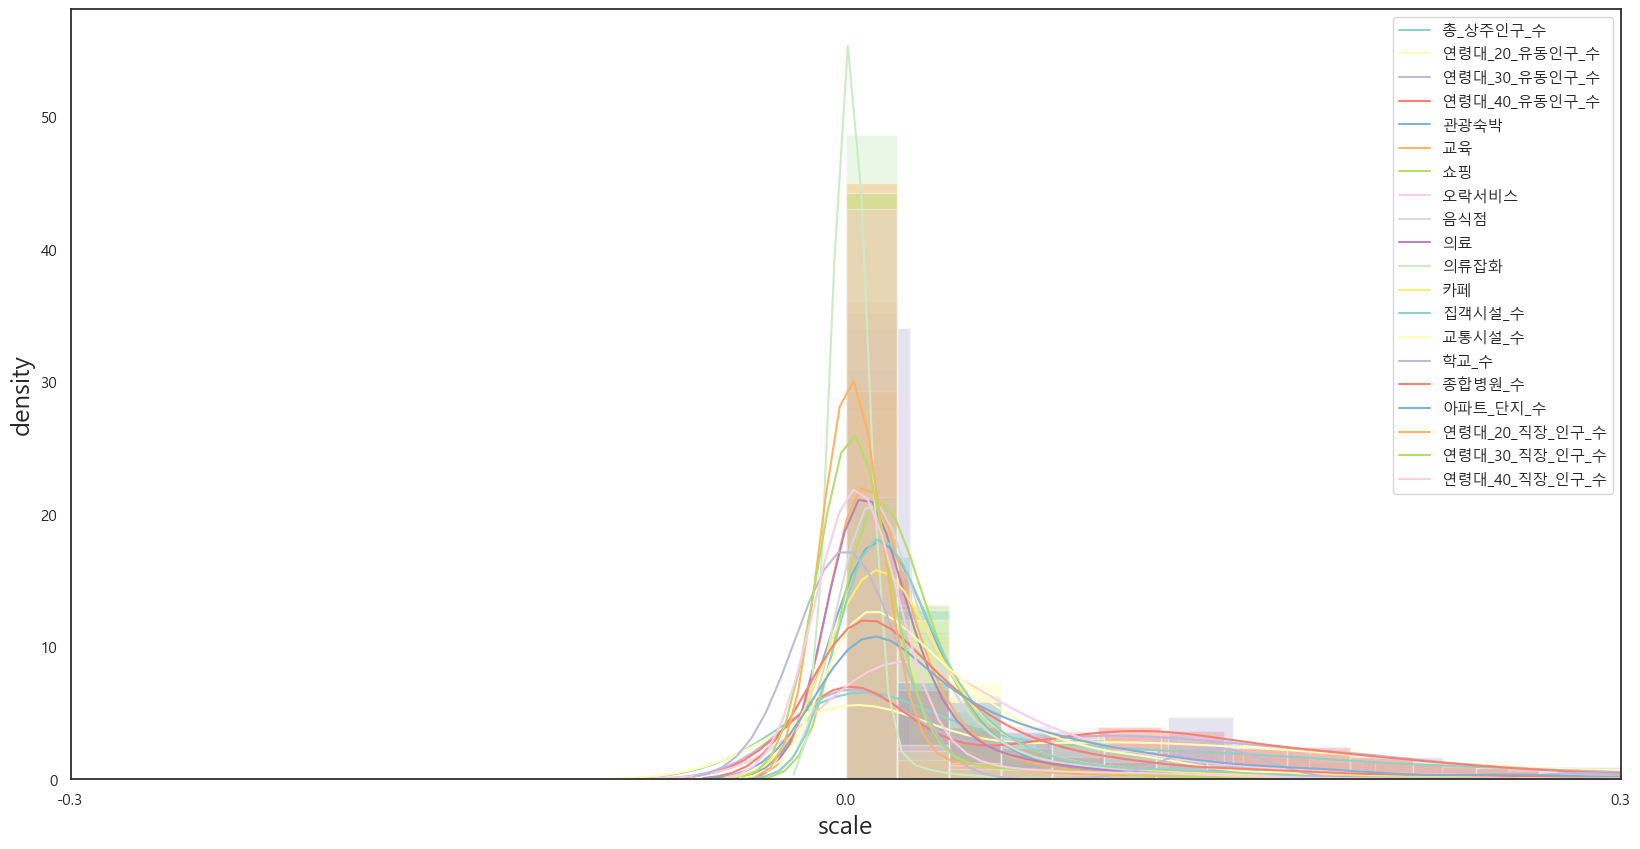

In [263]:

color = sns.color_palette("Set3", len(minmax_scaling_data.columns))
plt.rcParams['figure.figsize'] = (20, 10)
for idx, column in enumerate(target_col):
  sns.distplot(minmax_scaling_data[column], color=color[idx])

plt.legend(target_col)
plt.ylabel('density', fontsize=18)
plt.xlabel('scale', fontsize=18)
plt.xlim([-0.3, 0.3])
plt.xticks([-0.3, 0, 0.3])
plt.show()

In [264]:
standard_scaler = StandardScaler()
standard_scaling_data = standard_scaler.fit_transform(minmax_scaling_data[target_col])

In [265]:
round(pd.DataFrame(standard_scaling_data).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00,1623.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.77,-0.82,-0.90,-0.92,-0.44,-0.41,-0.58,-0.62,-0.56,-0.46,-0.14,-0.51,-0.62,-0.74,-0.34,-0.57,-0.71,-0.25,-0.25,-0.27
25%,-0.77,-0.82,-0.90,-0.92,-0.35,-0.37,-0.42,-0.50,-0.44,-0.43,-0.13,-0.42,-0.47,-0.55,-0.34,-0.57,-0.64,-0.24,-0.24,-0.26
50%,-0.38,-0.24,-0.15,-0.13,-0.23,-0.23,-0.24,-0.33,-0.28,-0.31,-0.11,-0.28,-0.28,-0.36,-0.34,-0.33,-0.35,-0.22,-0.22,-0.23
75%,0.43,0.47,0.56,0.57,-0.03,0.01,0.07,0.05,0.04,-0.02,-0.07,-0.01,0.09,0.21,-0.34,0.14,0.25,-0.15,-0.15,-0.14
max,7.18,6.81,8.74,9.21,14.05,17.95,19.40,8.12,18.76,17.43,34.05,13.44,17.88,15.92,11.28,11.87,11.76,19.62,16.99,14.48


In [266]:
result_data.corr()

,총_상주인구_수,연령대_20_유동인구_수,상권_코드,연령대_30_유동인구_수,연령대_40_유동인구_수,관광숙박,교육,쇼핑,오락서비스,음식점,...,아파트_단지_수,연령대_20_매출_금액,연령대_20_매출_건수,연령대_30_매출_금액,연령대_30_매출_건수,연령대_40_매출_금액,연령대_40_매출_건수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수
총_상주인구_수,1.000000,0.667780,-0.334401,0.754032,0.755687,-0.050584,0.028507,0.058311,-0.065577,-0.082042,...,0.823818,-0.135007,-0.110263,-0.127935,-0.119191,-0.122985,-0.126537,-0.118072,-0.119231,-0.111444
연령대_20_유동인구_수,0.667780,1.000000,-0.362299,0.893472,0.840833,-0.101747,-0.042591,-0.029098,-0.131885,-0.125448,...,0.423762,-0.139022,-0.097529,-0.146124,-0.142573,-0.151233,-0.170509,-0.137065,-0.137430,-0.135030
상권_코드,-0.334401,-0.362299,1.000000,-0.391613,-0.402727,-0.089610,0.008325,-0.152667,-0.061327,-0.065057,...,-0.208501,-0.120526,-0.109708,-0.101382,-0.122879,-0.049919,-0.074200,-0.148314,-0.139745,-0.125555
연령대_30_유동인구_수,0.754032,0.893472,-0.391613,1.000000,0.972863,-0.101213,-0.044846,-0.021655,-0.137650,-0.143058,...,0.534066,-0.162727,-0.133415,-0.158347,-0.160484,-0.160764,-0.183807,-0.144446,-0.146618,-0.143002
연령대_40_유동인구_수,0.755687,0.840833,-0.402727,0.972863,1.000000,-0.108455,-0.034509,-0.036081,-0.149053,-0.154211,...,0.543534,-0.174099,-0.151467,-0.166993,-0.174736,-0.164716,-0.190197,-0.151097,-0.153629,-0.149601
관광숙박,-0.050584,-0.101747,-0.089610,-0.101213,-0.108455,1.000000,0.325901,0.776234,0.701274,0.633256,...,0.060548,0.618820,0.606613,0.625171,0.713234,0.640044,0.693854,0.654402,0.676483,0.677952
교육,0.028507,-0.042591,0.008325,-0.044846,-0.034509,0.325901,1.000000,0.297353,0.445443,0.351905,...,0.109796,0.334808,0.337676,0.294742,0.336677,0.366945,0.433659,0.282823,0.288427,0.295141
쇼핑,0.058311,-0.029098,-0.152667,-0.021655,-0.036081,0.776234,0.297353,1.000000,0.696822,0.663692,...,0.152504,0.627891,0.637744,0.644899,0.757657,0.589719,0.733626,0.661190,0.680637,0.676888
오락서비스,-0.065577,-0.131885,-0.061327,-0.137650,-0.149053,0.701274,0.445443,0.696822,1.000000,0.762157,...,0.109516,0.709140,0.733603,0.607006,0.746049,0.507447,0.713414,0.543927,0.549341,0.554294
음식점,-0.082042,-0.125448,-0.065057,-0.143058,-0.154211,0.633256,0.351905,0.663692,0.762157,1.000000,...,0.036581,0.720207,0.716401,0.696102,0.778610,0.592672,0.769141,0.565339,0.581309,0.586434


<AxesSubplot: >

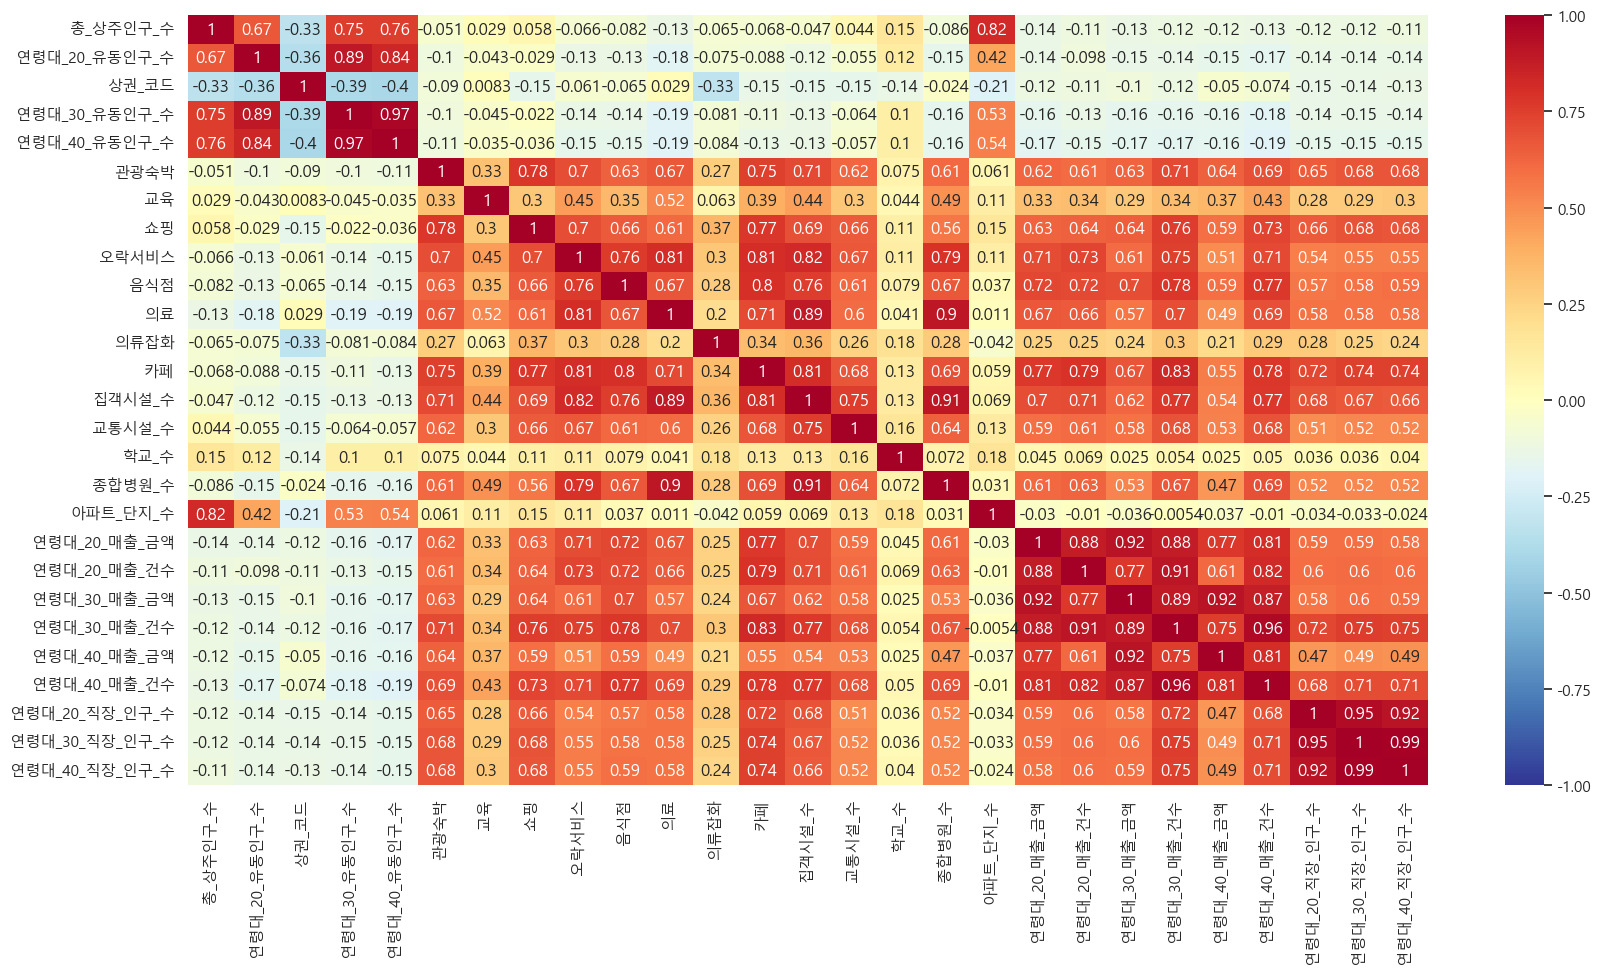

In [267]:
df=result_data.corr()

sns.heatmap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )